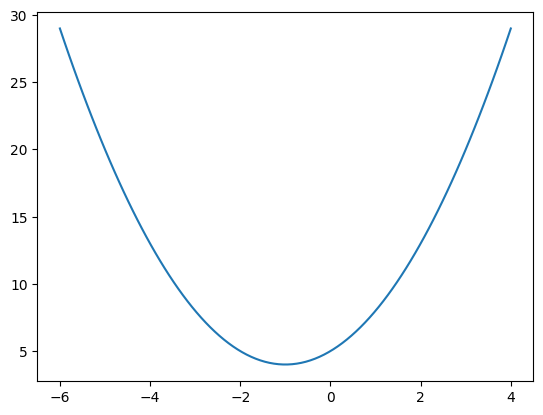

In [1]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 4, 100)
y = x ** 2 + 2 * x + 5
plt.plot(x, y)
plt.show()

最小值点x= -0.9999999616185459 最小值y 4.000000000000002 迭代次数n= 139


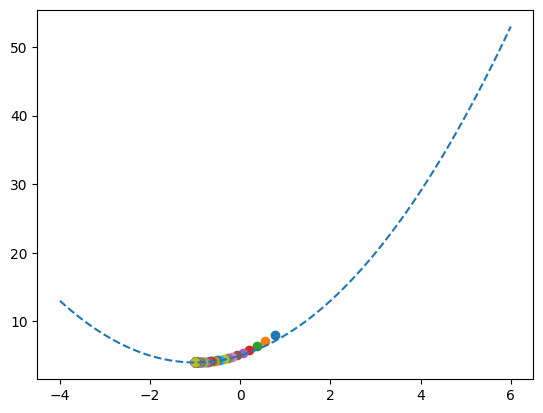

In [2]:
#将迭代的点描绘出来更直观形象
x_iter = 1  #设置x的初始值
yita = 0.06  #步长
count = 0  #记录迭代次数
while True:
    count += 1
    y_last = x_iter ** 2 + 2 * x_iter + 5
    x_iter = x_iter - yita * (2 * x_iter + 2)
    y_next = x_iter ** 2 + 2 * x_iter + 5
    plt.scatter(x_iter, y_last)
    if abs(y_next - y_last) < 1e-100:
        break
print('最小值点x=', x_iter, '最小值y', y_next, '迭代次数n=', count)
x = np.linspace(-4, 6, 100)
y = x ** 2 + 2 * x + 5
plt.plot(x, y, '--')
plt.show()

In [4]:
#----牛顿法求根-----#


def f(x):
    y = x ** 3 - x - 1  #求根方程的表达式
    return y


def g(x):
    y = 3 * x ** 2 - 1  #求根方程的导函数
    return y


def main():
    x0 = 1.5  #取初值
    e = 10 ** (-9)  #误差要求
    L = 0  #初始化迭代次数
    while L < 100:  #采用残差来判断
        x1 = x0 - f(x0) / g(x0)  #迭代公式,x(n+1)=x(n)-f(x(n))/f'(x(n))
        x0 = x1
        L = L + 1  #统计迭代次数
        if abs(f(x0) - 0) < e:
            break
    print(f"x1={x1}")  #输出数值解
    print(f(x0) - 0)  # 验证解的正确性
    print(f"L={L}")  #输出迭代次数


if __name__ == '__main__':
    main()

x1=1.3247179572447898
1.865174681370263e-13
L=4


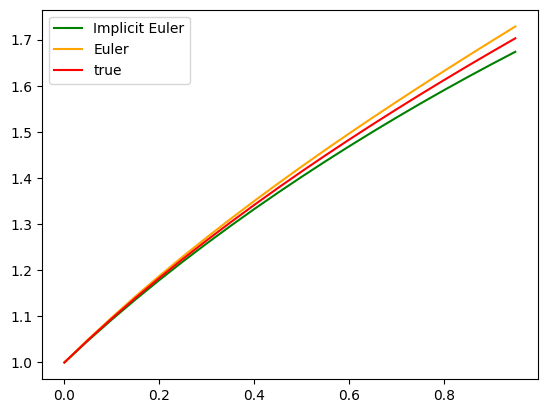

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.zeros(20)
y = np.zeros(20)
y_E = np.zeros(20)
z = np.zeros(20)
x[0] = 0
y[0] = 1
y_E[0] = 1
z[0] = (1 + 2 * x[0]) ** 0.5
h = 0.05


def f(x, y):
    f = y - 2 * x / y
    return f


def F(x, y, yn):
    F = h * (y - 2 * x / y) - y + yn
    return F


def ff(x, y):
    ff = 0.1 * x / y ** 2 - 0.95
    return ff


def newtonMethod(assum, d1, d3):
    y = assum
    Next = 0
    A = F(d1, y, d3)
    B = ff(d1, y)
    if F(d1, y, d3) == 0.0:
        return y
    else:
        Next = y - A / B
    if abs(A - F(d1, Next, d3)) < 1e-5:
        return Next
        '''设置迭代跳出条件，同时输出满足f(x) = 0的x值'''
    else:
        return newtonMethod(Next, d1, d3)


for i in range(1, 20):
    x[i] = x[i - 1] + h
    y[i] = newtonMethod(4, x[i], y[i - 1])
    y_E[i] = y_E[i - 1] + h * f(x[i - 1], y_E[i - 1])
    z[i] = (1 + 2 * x[i]) ** 0.5

plt.plot(x, y, label='Implicit Euler', color='green')
plt.plot(x, y_E, label='Euler', color='orange')
plt.plot(x, z, label='true', color='red')
plt.legend()
plt.show()

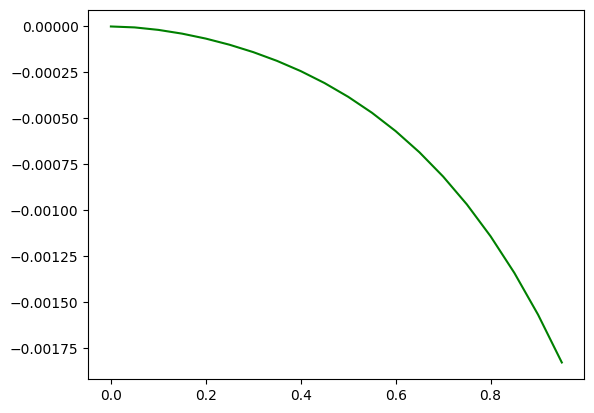

In [7]:
plt.plot(x, (y + y_E) / 2 - z, color='green')
plt.show()

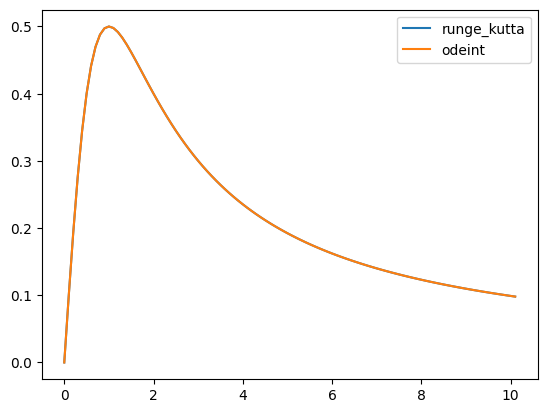

In [3]:

import numpy as np
import matplotlib.pyplot as plt


def runge_kutta(y, x, dx, f):
    """ y is the initial value for y
        x is the initial value for x
        dx is the time step in x
        f is derivative of function y(t)
    """
    k1 = dx * f(y, x)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.


t = 0.
y = 0.
dt = .1
ys, ts = [0], [0]


def func(y, t):
    return 1 / (1 + t ** 2) - 2 * y ** 2


while t <= 10:
    y = runge_kutta(y, t, dt, func)
    t += dt
    ys.append(y)
    ts.append(t)
YS = odeint(func, y0=0, t=np.arange(0, 10.2, 0.1))
plt.plot(ts, ys, label='runge_kutta')
plt.plot(ts, YS, label='odeint')
plt.legend()
plt.show()

e:\anaconda\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


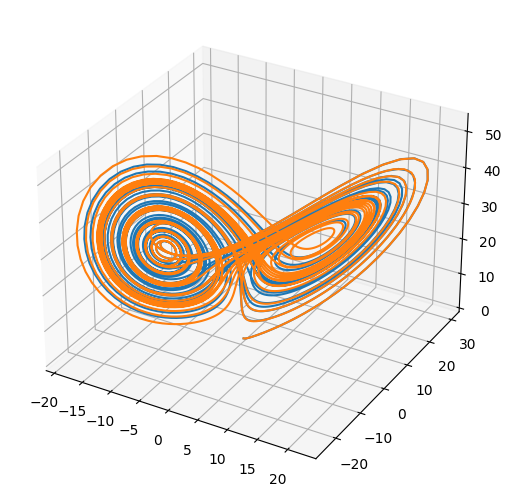

In [9]:
import numpy as np


def move(P, steps, sets):
    x, y, z = P
    sgima, rho, beta = sets
    # 各方向的速度近似
    dx = sgima * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [x + dx * steps, y + dy * steps, z + dz * steps]


# 设置sets参数
sets = [10., 28., 3.]
t = np.arange(0, 30, 0.01)

# 位置1：
P0 = [0., 1., 0.]
P = P0
d = []
for v in t:
    P = move(P, 0.01, sets)
    d.append(P)
dnp = np.array(d)

# 位置2：
P02 = [0., 1.01, 0.]
P = P02
d = []
for v in t:
    P = move(P, 0.01, sets)
    d.append(P)
dnp2 = np.array(d)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(dnp[:, 0], dnp[:, 1], dnp[:, 2])
ax.plot(dnp2[:, 0], dnp2[:, 1], dnp2[:, 2])
plt.show()

In [10]:
import numpy as np
import pandas as pd
import datetime

start_time = datetime.datetime.now()
np.set_printoptions(suppress=True)


def left_boundary(t):  # 左边值
    return np.exp(t)


def right_boundary(t):  # 右边值
    return np.exp(t + 1)


def initial_T(x_max, t_max, delta_x, delta_t, m, n):  # 给温度T初始化
    T = np.zeros((n + 1, m + 1))
    for i in range(m + 1):  # 初值
        T[0, i] = np.exp(i * delta_x)

    for i in range(1, n + 1):  # 注意不包括T[0,0]与T[0,-1]
        T[i, 0] = left_boundary(i * delta_t)  # 左边值
        T[i, -1] = right_boundary(i * delta_t)  # 右边值
    return T


# 一、古典显格式
def one_dimensional_heat_conduction1(T, m, n, r):
    # 可以发现当r>=0.5时就发散了
    for k in range(1, n + 1):  # 时间层
        for i in range(1, m):  # 空间层
            T[k, i] = (1 - 2 * r) * T[k - 1, i] + r * (T[k - 1, i - 1] + T[k - 1, i + 1])
    return T.round(6)


# 二、古典隐格式（乘逆矩阵法）
def one_dimensional_heat_conduction2(T, m, n, r):
    A = np.eye(m - 1, k=0) * (1 + 2 * r) + np.eye(m - 1, k=1) * (-r) + np.eye(m - 1, k=-1) * (-r)
    a = np.ones(m - 1) * (-r)
    a[0] = 0
    b = np.ones(m - 1) * (1 + 2 * r)
    c = np.ones(m - 1) * (-r)
    c[-1] = 0

    F = np.zeros(m - 1)  # m-1个元素，索引0~(m-2)
    for k in range(1, n + 1):  # 时间层range(1, n + 1)
        F[0] = T[k - 1, 1] + r * T[k, 0]
        F[-1] = T[k - 1, m - 1] + r * T[k, m]
        for i in range(1, m - 2):  # 空间层
            F[i] = T[k - 1, i + 1]  # 给F赋值
        for i in range(1, m - 1):
            T[k, 1:-1] = np.linalg.inv(A) @ F  # 左乘A逆
    return T.round(6)


# 三、古典隐格式（追赶法）
def one_dimensional_heat_conduction3(T, m, n, r):
    a = np.ones(m - 1) * (-r)
    a[0] = 0
    b = np.ones(m - 1) * (1 + 2 * r)
    c = np.ones(m - 1) * (-r)
    c[-1] = 0

    F = np.zeros(m - 1)  # m-1个元素，索引0~(m-2)
    for k in range(1, n + 1):  # 时间层range(1, n + 1)
        F[0] = T[k - 1, 1] + r * T[k, 0]
        F[-1] = T[k - 1, m - 1] + r * T[k, m]
        y = np.zeros(m - 1)
        beta = np.zeros(m - 1)
        x = np.zeros(m - 1)
        y[0] = F[0] / b[0]
        d = b[0]
        for i in range(1, m - 2):  # 空间层
            F[i] = T[k - 1, i + 1]  # 给F赋值
        for i in range(1, m - 1):
            beta[i - 1] = c[i - 1] / d
            d = b[i] - a[i] * beta[i - 1]
            y[i] = (F[i] - a[i] * y[i - 1]) / d
        x[-1] = y[-1]
        for i in range(m - 3, -1, -1):
            x[i] = y[i] - beta[i] * x[i + 1]
        T[k, 1:-1] = x
    return T.round(6)


# 四、Crank-Nicolson（乘逆矩阵法）
def one_dimensional_heat_conduction4(T, m, n, r):
    A = np.eye(m - 1, k=0) * (1 + r) + np.eye(m - 1, k=1) * (-r * 0.5) + np.eye(m - 1, k=-1) * (-r * 0.5)
    C = np.eye(m - 1, k=0) * (1 - r) + np.eye(m - 1, k=1) * (0.5 * r) + np.eye(m - 1, k=-1) * (0.5 * r)

    for k in range(0, n):  # 时间层
        F = np.zeros(m - 1)  # m-1个元素，索引0~(m-2)
        F[0] = r / 2 * (T[k, 0] + T[k + 1, 0])
        F[-1] = r / 2 * (T[k, m] + T[k + 1, m])
        F = C @ T[k, 1:m] + F
        T[k + 1, 1:-1] = np.linalg.inv(A) @ F
    return T.round(6)


# 五、Crank-Nicolson（追赶法）
def one_dimensional_heat_conduction5(T, m, n, r):
    C = np.eye(m - 1, k=0) * (1 - r) + np.eye(m - 1, k=1) * (0.5 * r) + np.eye(m - 1, k=-1) * (0.5 * r)
    a = np.ones(m - 1) * (-0.5 * r)
    a[0] = 0
    b = np.ones(m - 1) * (1 + r)
    c = np.ones(m - 1) * (-0.5 * r)
    c[-1] = 0

    for k in range(0, n):  # 时间层
        F = np.zeros(m - 1)  # m-1个元素，索引0~(m-2)
        F[0] = r * 0.5 * (T[k, 0] + T[k + 1, 0])
        F[-1] = r * 0.5 * (T[k, m] + T[k + 1, m])
        F = C @ T[k, 1:m] + F
        y = np.zeros(m - 1)
        beta = np.zeros(m - 1)
        x = np.zeros(m - 1)
        y[0] = F[0] / b[0]
        d = b[0]
        for i in range(1, m - 1):
            beta[i - 1] = c[i - 1] / d
            d = b[i] - a[i] * beta[i - 1]
            y[i] = (F[i] - a[i] * y[i - 1]) / d
        x[-1] = y[-1]
        for i in range(m - 3, -1, -1):
            x[i] = y[i] - beta[i] * x[i + 1]
        T[k + 1, 1:-1] = x
    return T.round(6)


def exact_solution(T, m, n, r, delta_x, delta_t):  # 偏微分方程精确解
    for i in range(n + 1):
        for j in range(m + 1):
            T[i, j] = np.exp(i * delta_t + j * delta_x)
    return T.round(6)


a = 1  # 热传导系数
x_max = 1
t_max = 1
delta_x = 0.1  # 空间步长
delta_t = 0.1  # 时间步长
m = int((x_max / delta_x).__round__(4))  # 长度等分成m份
n = int((t_max / delta_t).__round__(4))  # 时间等分成n份
t_grid = np.arange(0, t_max + delta_t, delta_t)  # 时间网格
x_grid = np.arange(0, x_max + delta_x, delta_x)  # 位置网格
r = (a * delta_t / (delta_x ** 2)).__round__(6)  # 网格比
T = initial_T(x_max, t_max, delta_x, delta_t, m, n)
print('长度等分成{}份'.format(m))
print('时间等分成{}份'.format(n))
print('网格比=', r)

p = pd.ExcelWriter('有限差分法-一维热传导-题目1.xlsx')

T1 = one_dimensional_heat_conduction1(T, m, n, r)
T1 = pd.DataFrame(T1, columns=x_grid, index=t_grid)  # colums是列号，index是行号
T1.to_excel(p, '古典显格式')

T2 = one_dimensional_heat_conduction2(T, m, n, r)
T2 = pd.DataFrame(T2, columns=x_grid, index=t_grid)  # colums是列号，index是行号
T2.to_excel(p, '古典隐格式（乘逆矩阵法）')

T3 = one_dimensional_heat_conduction3(T, m, n, r)
T3 = pd.DataFrame(T3, columns=x_grid, index=t_grid)  # colums是列号，index是行号
T3.to_excel(p, '古典隐格式（追赶法）')

T4 = one_dimensional_heat_conduction4(T, m, n, r)
T4 = pd.DataFrame(T4, columns=x_grid, index=t_grid)  # colums是列号，index是行号
T4.to_excel(p, 'Crank-Nicolson格式（乘逆矩阵法）')

T5 = one_dimensional_heat_conduction5(T, m, n, r)
T5 = pd.DataFrame(T5, columns=x_grid, index=t_grid)  # colums是列号，index是行号
T5.to_excel(p, 'Crank-Nicolson格式（追赶法）')

T6 = exact_solution(T, m, n, r, delta_x, delta_t)
T6 = pd.DataFrame(T6, columns=x_grid, index=t_grid)  # colums是列号，index是行号
T6.to_excel(p, '偏微分方程精确解')

p.save()

end_time = datetime.datetime.now()
print('运行时间为', (end_time - start_time))

长度等分成10份
时间等分成10份
网格比= 10.0
运行时间为 0:00:00.233072


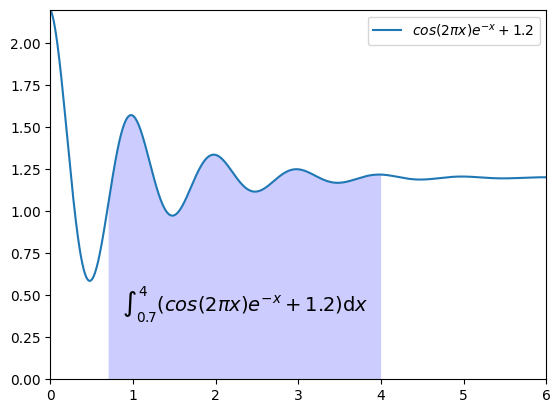

In [11]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 6, 1000)
y = np.cos(2 * np.pi * x) * np.exp(-x) + 1.2
plt.axis([np.min(x), np.max(x), 0, np.max(y)])  #坐标范围
plt.plot(x, y, label="$cos(2πx)e^{-x}+1.2$")  #画曲线，带图示
plt.fill_between(x, y1=y, y2=0, where=(x >= 0.7) & (x <= 4),  #填充积分区域
                 facecolor='blue', alpha=0.2)
plt.text(0.5 * (0.7 + 4), 0.4, r"$\int_{0.7}^4(cos(2πx)e^{-x}+1.2)\mathrm{d}x$",
         horizontalalignment='center', fontsize=14)  #增加说明文本
plt.legend()  #显示图示
plt.show()

In [14]:
'''
1. 将积分区间划分为1000段
2. 对于每个积分区间，求解左端点和右端点的函数值
3. 求直角梯形面积
4. 求和
'''
h = x[1] - x[0]
xn = 0.7
s = 0
for i in range(1000):
    xn1 = xn + h
    yn = np.cos(2 * np.pi * xn) * np.exp(-xn) + 1.2
    yn1 = np.cos(2 * np.pi * xn1) * np.exp(-xn1) + 1.2
    s0 = (yn + yn1) * h / 2
    s += s0
    xn = xn1
s

7.2765412664746245